#  SHAP for Linear Models 1

In [1]:
import pandas as pd

# set the fule URl and filename
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
filename = 'wine.csv'

# Check if the file is in the current directory
try:
    wine = pd.read_csv(filename)
except FileNotFoundError:
    print(f'Downloading {filename}from {url} ...')
    wine = pd.read_csv(url, sep=";")
    wine.to_csv(filename, index=False)
    print('Download complete!')
        

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Feature Analysis

In [3]:
from tabulate import tabulate
summary = wine.describe().transpose().round(2)
summary = summary.drop("count", axis=1)

# create a markdown table
markdown_table = tabulate(
    summary, headers='keys', tablefmt='pipe'
)
print(markdown_table)

|                      |   mean |   std |   min |    25% |    50% |    75% |    max |
|:---------------------|-------:|------:|------:|-------:|-------:|-------:|-------:|
| fixed acidity        |   6.85 |  0.84 |  3.8  |   6.3  |   6.8  |   7.3  |  14.2  |
| volatile acidity     |   0.28 |  0.1  |  0.08 |   0.21 |   0.26 |   0.32 |   1.1  |
| citric acid          |   0.33 |  0.12 |  0    |   0.27 |   0.32 |   0.39 |   1.66 |
| residual sugar       |   6.39 |  5.07 |  0.6  |   1.7  |   5.2  |   9.9  |  65.8  |
| chlorides            |   0.05 |  0.02 |  0.01 |   0.04 |   0.04 |   0.05 |   0.35 |
| free sulfur dioxide  |  35.31 | 17.01 |  2    |  23    |  34    |  46    | 289    |
| total sulfur dioxide | 138.36 | 42.5  |  9    | 108    | 134    | 167    | 440    |
| density              |   0.99 |  0    |  0.99 |   0.99 |   0.99 |   1    |   1.04 |
| pH                   |   3.19 |  0.15 |  2.72 |   3.09 |   3.18 |   3.28 |   3.82 |
| sulphates            |   0.49 |  0.11 |  0.22 |   0.

## Fitting a Linear Regression Model

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = wine['quality']
X = wine.drop('quality', axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate Model

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

MAE: 0.586
MSE: 0.569
RMSE: 0.754


### Interpreting the Coefficients

In [10]:
coefs = pd.DataFrame({
    'feature': X.columns.values,
    'coefficient': np.round(model.coef_, 3)
}) 
print(coefs.to_markdown(index=False))

| feature              |   coefficient |
|:---------------------|--------------:|
| fixed acidity        |         0.046 |
| volatile acidity     |        -1.915 |
| citric acid          |        -0.061 |
| residual sugar       |         0.071 |
| chlorides            |        -0.026 |
| free sulfur dioxide  |         0.005 |
| total sulfur dioxide |        -0     |
| density              |      -124.264 |
| pH                   |         0.601 |
| sulphates            |         0.649 |
| alcohol              |         0.229 |


## SHAP Values

In [11]:
import shap
explainer = shap.LinearExplainer(model, X_train)

In [12]:
shap_values = explainer(X_test)

In [13]:
# print(shap_values)

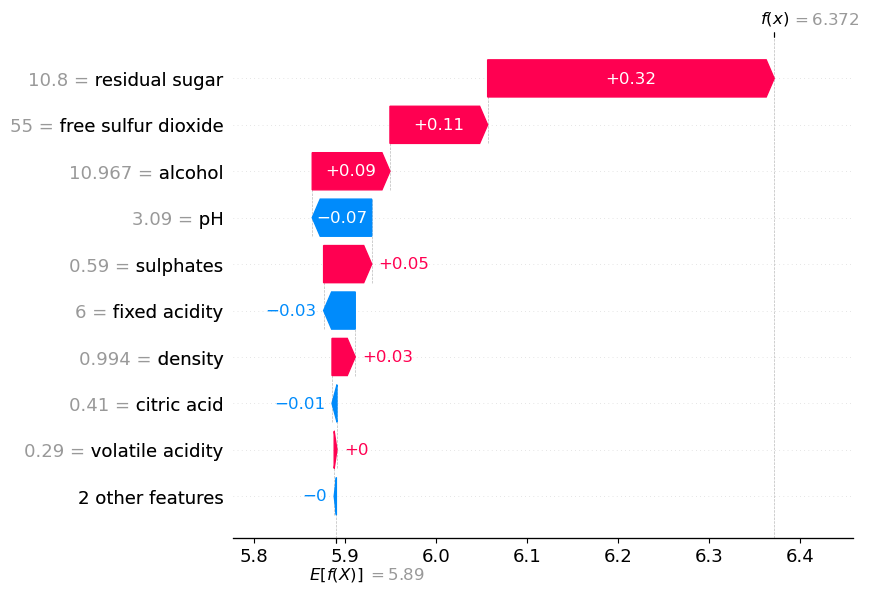

In [25]:
shap.plots.waterfall(shap_values[0])

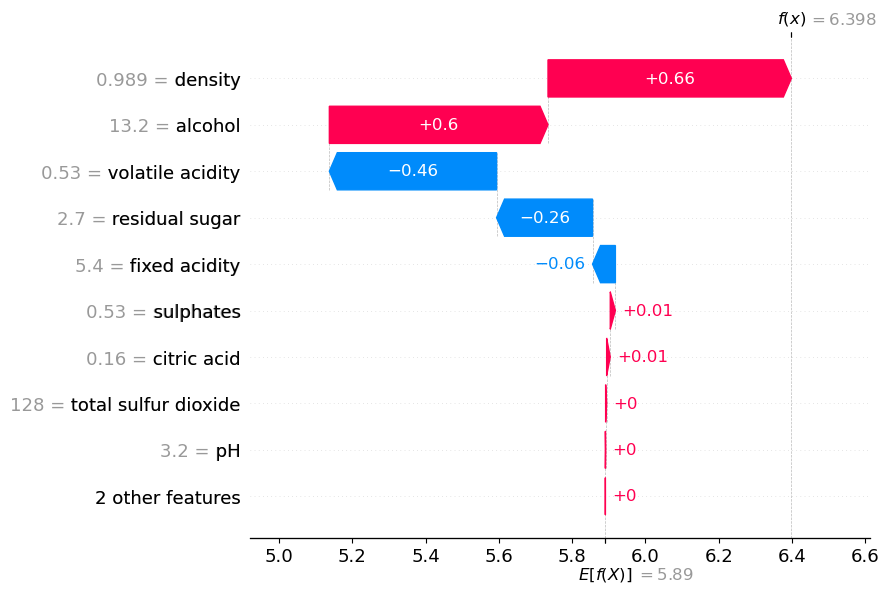

In [15]:
shap.plots.waterfall(shap_values[1])

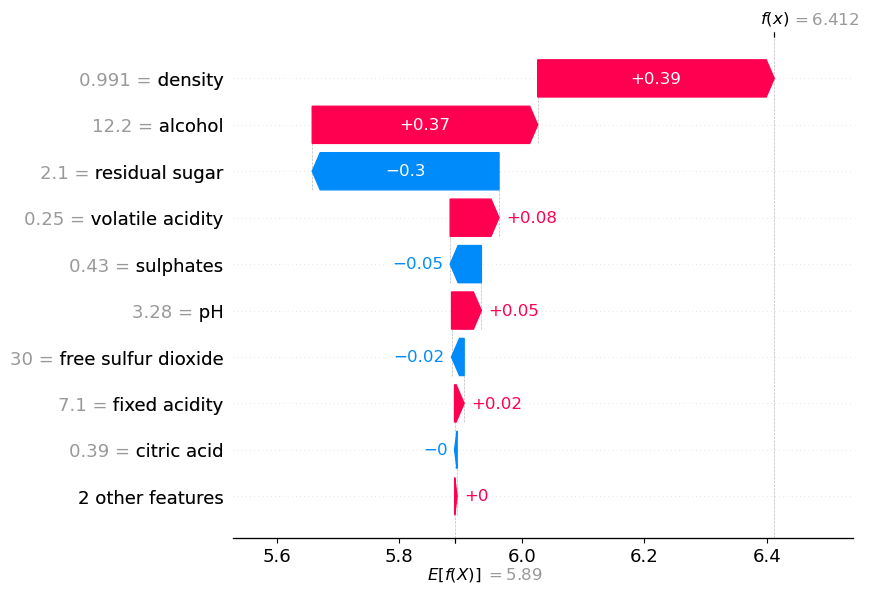

In [19]:
shap.plots.waterfall(shap_values[2])

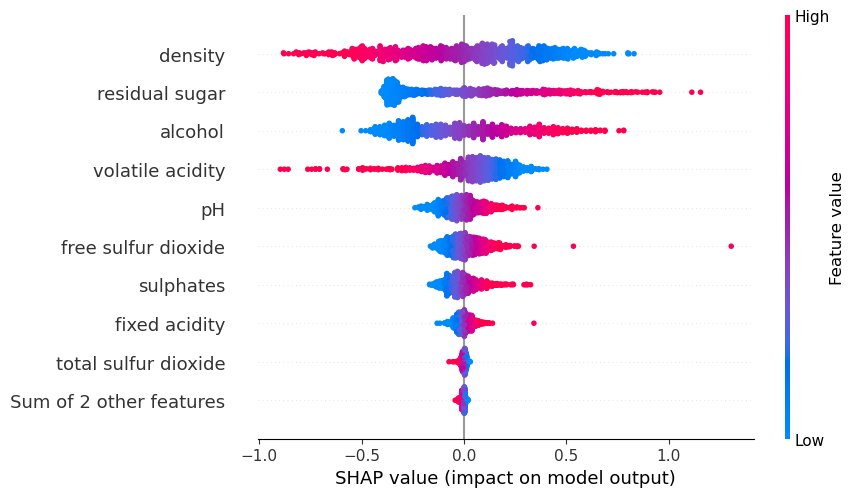

In [16]:
shap.plots.beeswarm(shap_values)

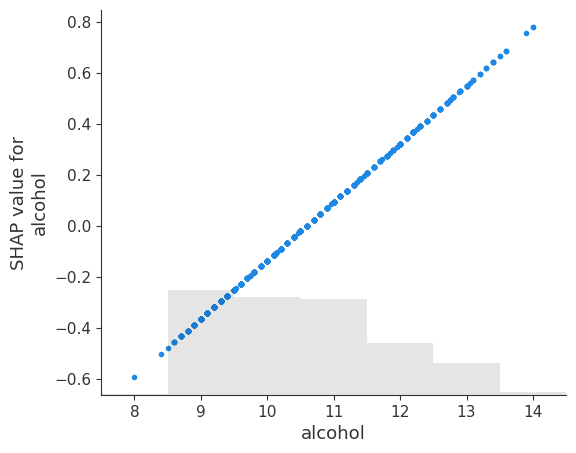

In [17]:
shap.plots.scatter(shap_values[:, 'alcohol'])

In [18]:
feature = 'alcohol'
ind = X_test.columns.get_loc(feature)
coefs.coefficient[ind]

0.229

In [20]:
shap_values

.values =
array([[-0.03479769,  0.00306381, -0.00545601, ..., -0.06541621,
         0.05289943,  0.08545841],
       [-0.06234203, -0.45650842,  0.00986986, ...,  0.00066077,
         0.01395506,  0.59691113],
       [ 0.01570028,  0.07965919, -0.00422994, ...,  0.04871676,
        -0.05095221,  0.36790245],
       ...,
       [-0.03938841,  0.06051034,  0.00680469, ...,  0.04871676,
        -0.05095221, -0.250421  ],
       [ 0.03406317,  0.00306381,  0.00067434, ..., -0.07142321,
         0.02044579, -0.29622273],
       [-0.00266262,  0.13710572, -0.00422994, ...,  0.18087073,
        -0.0249893 , -0.13591665]])

.base_values =
array([5.89045501, 5.89045501, 5.89045501, 5.89045501, 5.89045501,
       5.89045501, 5.89045501, 5.89045501, 5.89045501, 5.89045501,
       5.89045501, 5.89045501, 5.89045501, 5.89045501, 5.89045501,
       5.89045501, 5.89045501, 5.89045501, 5.89045501, 5.89045501,
       5.89045501, 5.89045501, 5.89045501, 5.89045501, 5.89045501,
       5.89045501, 5.89045

In [23]:
bob = pd.DataFrame(shap_values.values, columns=X.columns)

In [24]:
bob

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.034798,0.003064,-0.005456,0.315057,-0.000090,0.107406,-0.002311,0.025561,-0.065416,0.052899,0.085458
1,-0.062342,-0.456508,0.009870,-0.261983,0.000227,-0.000102,0.002774,0.664279,0.000661,0.013955,0.596911
2,0.015700,0.079659,-0.004230,-0.304727,0.000227,-0.020580,0.003742,0.385927,0.048717,-0.050952,0.367902
3,0.024882,0.022213,-0.001778,-0.340347,-0.000249,-0.015461,-0.002069,0.264148,-0.011353,-0.024989,0.024389
4,-0.011844,-0.054383,-0.001165,-0.048265,0.000016,-0.035939,0.011734,0.256692,0.048717,0.059390,0.322101
...,...,...,...,...,...,...,...,...,...,...,...
975,0.001928,0.156255,-0.006069,-0.368843,-0.000011,-0.051297,0.003258,0.194560,-0.065416,0.234640,0.070191
976,0.024882,0.060510,-0.010360,-0.098132,0.000439,-0.010341,0.007859,0.037988,0.024689,0.020446,0.047290
977,-0.039388,0.060510,0.006805,0.436164,0.000280,0.010137,-0.003038,-0.409363,0.048717,-0.050952,-0.250421
978,0.034063,0.003064,0.000674,0.183264,-0.000276,-0.071775,-0.002796,-0.359658,-0.071423,0.020446,-0.296223


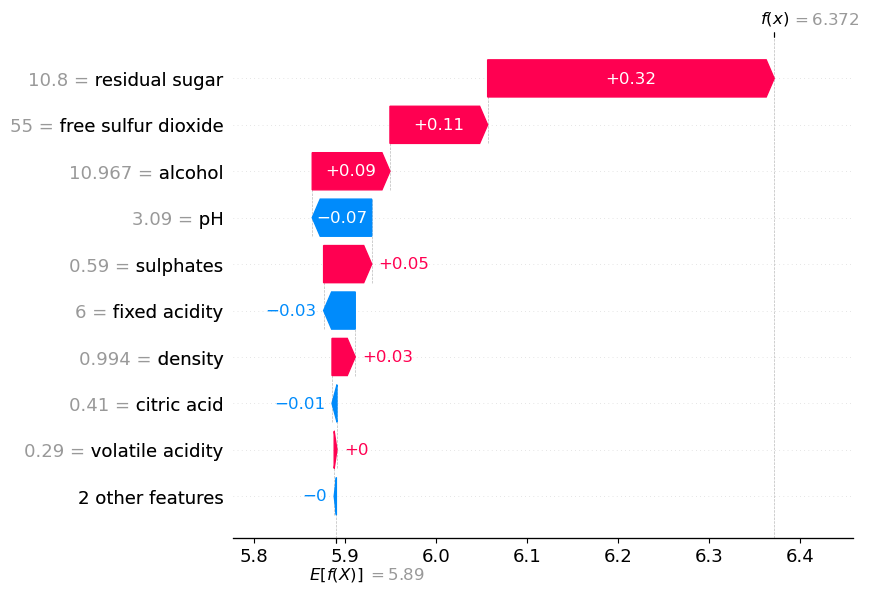

In [26]:
shap.plots.waterfall(shap_values[0])